### Morhpology (First Image)

##### Import statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.morphology import square, disk, binary_closing, binary_opening, binary_erosion, thin

##### Reading First Image

First Image Size: (336, 350)


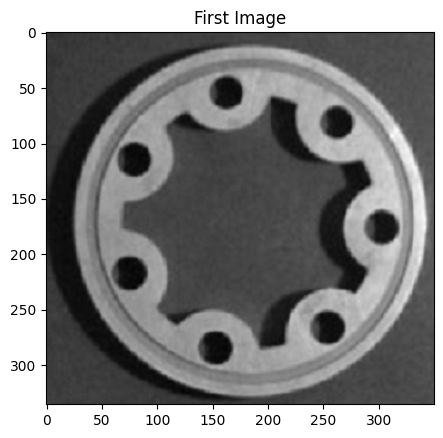

In [2]:
img = np.array( Image.open( "IMG/01.png").convert( "L"))

print( f"First Image Size: { img.shape}")

fig = plt.figure( figsize=( 5, 5))
plt.title( "First Image")
plt.imshow( img, cmap="gray")

plt.show()

##### First Image Histogram

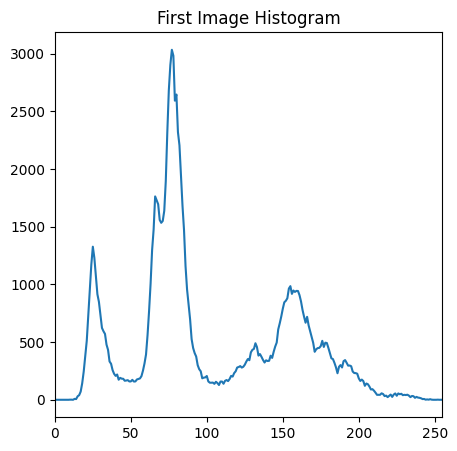

In [3]:
hist, bin = np.histogram( img.ravel(), 256, [ 0, 255])

plt.figure( figsize=( 5, 5))
plt.xlim( [ 0, 255])
plt.plot( hist)
plt.title( "First Image Histogram")
plt.show()

##### Thresholding First Image

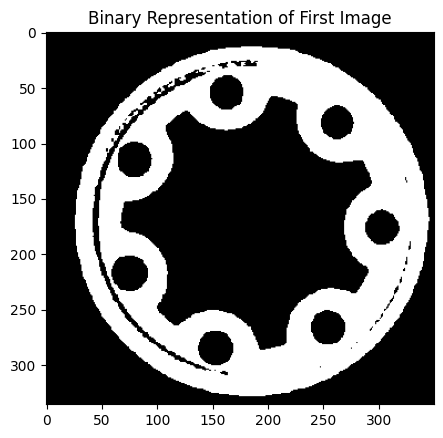

In [4]:
threshold = 120

thresholded_img = np.copy( img)
thresholded_img[ img > threshold] = 1
thresholded_img[ img <= threshold] = 0

plt.figure( figsize=( 5, 5))
plt.imshow( thresholded_img, cmap="gray")
plt.title( "Binary Representation of First Image")
plt.show()

##### Apply closing to first image

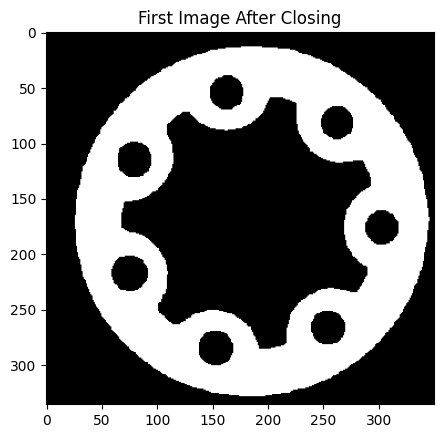

In [5]:
square_se = square( 7)

square_closing_img = binary_closing( thresholded_img, square_se)

plt.figure( figsize=( 5, 5))
plt.imshow( square_closing_img, cmap="gray")
plt.title( "First Image After Closing")
plt.show()

##### Finding bolts

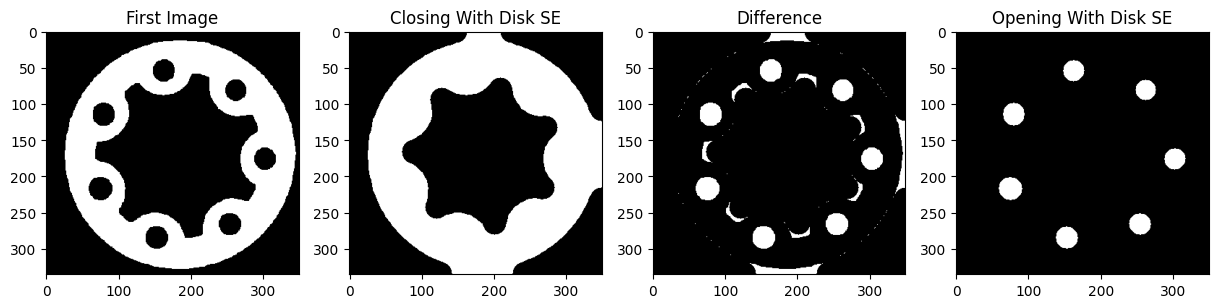

In [6]:
disk_se1 = disk( 16)

disk_closing_img = binary_closing( square_closing_img, disk_se1)

difference_img = disk_closing_img ^ square_closing_img

disk_se2 = disk( 14)
opened_difference_img = binary_opening( difference_img, disk_se2)

fig = plt.figure( figsize=( 15, 15))

fig.add_subplot( 1, 4, 1)
plt.imshow( square_closing_img, cmap="gray")
plt.title( "First Image")

fig.add_subplot( 1, 4, 2)
plt.imshow( disk_closing_img, cmap="gray")
plt.title( "Closing With Disk SE")

fig.add_subplot( 1, 4, 3)
plt.imshow( difference_img, cmap="gray")
plt.title( "Difference")

fig.add_subplot( 1, 4, 4)
plt.imshow( opened_difference_img, cmap="gray")
plt.title( "Opening With Disk SE")

plt.show()

##### Finding radius

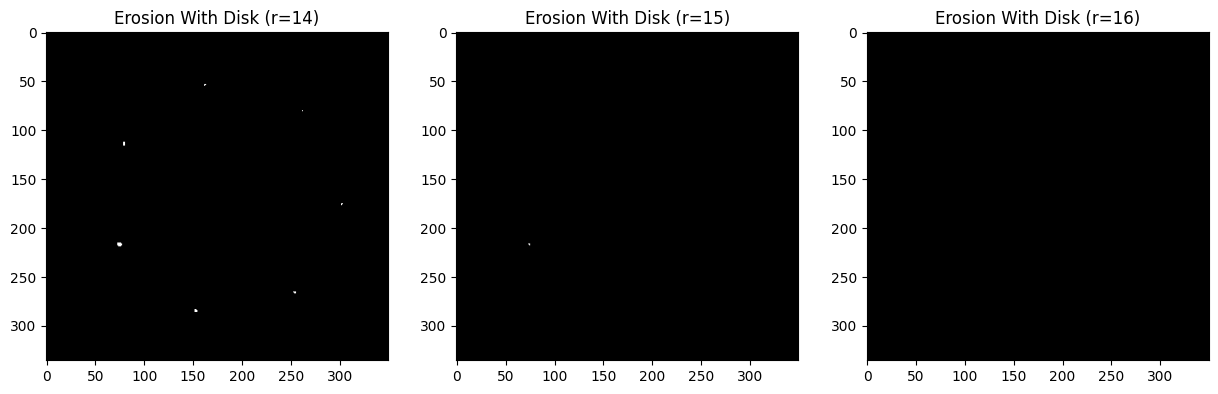

In [7]:
disk_se3 = disk( 14)
erode1 = binary_erosion( opened_difference_img, disk_se3)

disk_se4 = disk( 15)
erode2 = binary_erosion( opened_difference_img, disk_se4)

disk_se5 = disk( 16)
erode3 = binary_erosion( opened_difference_img, disk_se5)

fig = plt.figure( figsize=( 15, 15))

fig.add_subplot( 1, 3, 1)
plt.imshow( erode1, cmap="gray")
plt.title( "Erosion With Disk (r=14)")

fig.add_subplot( 1, 3, 2)
plt.imshow( erode2, cmap="gray")
plt.title( "Erosion With Disk (r=15)")

fig.add_subplot( 1, 3, 3)
plt.imshow( erode3, cmap="gray")
plt.title( "Erosion With Disk (r=16)")

plt.show()

##### Finding centers

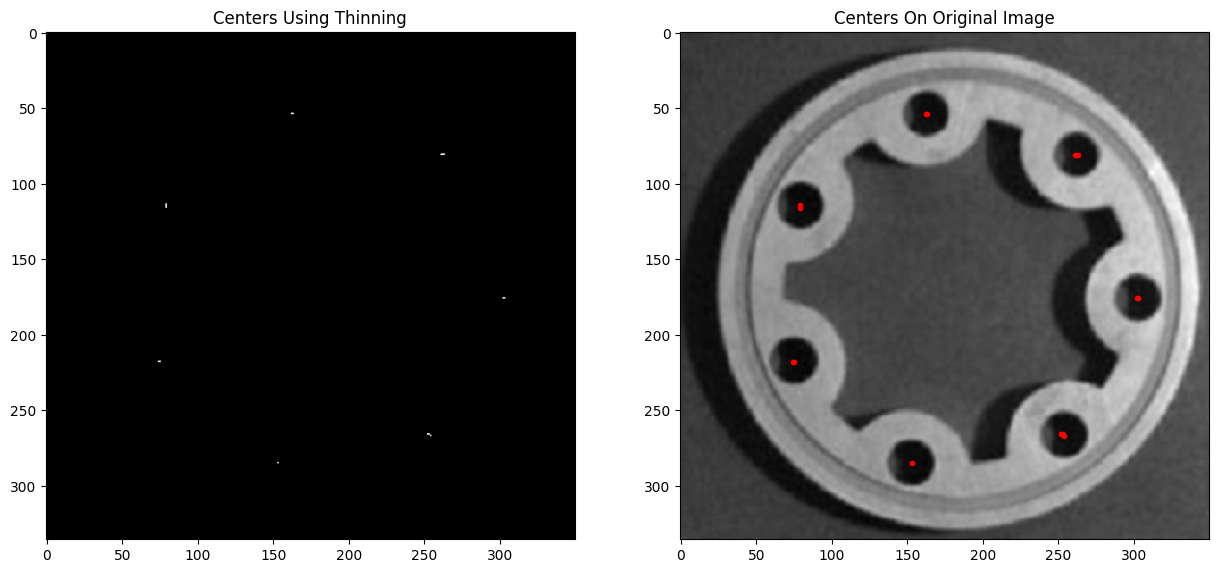

In [8]:
centers = thin( opened_difference_img)

centers_idx = np.where( centers > 0)

fig = plt.figure( figsize=( 15, 15))

fig.add_subplot( 1, 2, 1)
plt.imshow( centers, cmap="gray")
plt.title( "Centers Using Thinning")

fig.add_subplot( 1, 2, 2)
plt.imshow( img, cmap="gray")
for i in range( len( centers_idx[ 0])):
	plt.plot( centers_idx[ 1][ i], centers_idx[ 0][ i], marker=".", c="red")
plt.title( "Centers On Original Image")

plt.show()